# Demo do projeto

Através deste notebook é possível testar o funcionamento do nosso projeto de uma forma ágil e simples. Está dividido em várias secções cujo objetivo é facilitar a compreensão geral da simulação e dos algortimos de aprendizagem utilizados.

Podemos separar este notebook nas seguintes secções úteis:
* Teste da simulação e comportamento do agente com o agente aleatório
* Política fixa, análise de desempenho para os problemas
* Algoritmo genético + Redes Neuronais para ambos os problemas
* Aprendizagem por reforço para ambos os problemas

De notar que o nosso projeto foi criado para ser configurado através de ficheiros, nomeadamente: ficheiro do controlador, da simulação e do(s) agente(s). Por agora, os modelos de aprendizagem apenas funcionam com 1 agente, algo que poderá mudar mais tarde.

**Conteúdo dos ficheiros**:
* Ficheiro do Controlador: modo (se teste se aprendizagem); problema (se recoleção, se farol); ficheiro do motor de simulação usado e os vários parâmetros dos algoritmos
* Ficheiro do Motor de Simulação (independente do modo ou do problema): nº de passos máximos; descrição do ambiente (tamanho e elementos) e ficheiro(s) dos agente(s)
* Ficheiro do Agente: id; posição inicial; ângulo inicial e sensor

Como nos apercebemos que pode ser complicado gerir os ficheiros, criámos este notebook para que fosse agilizado o processo de teste.

In [2]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from controladorGenetico import *


 #### *Funções Auxiliares Fixo e Aleatório*

In [3]:
from controlador import criarControlador

def resetFarol(ficheiro_controlador, ficheiro_simulacao, ficheiro_agente,politica):
    texto_controlador = f"A\nF\n{politica}\nMS {ficheiro_simulacao}"
    texto_simulação = f"5\n50\nAG {ficheiro_agente}\n E farol (3,3) False False 100\nE parede (1,2) False True 0\nE parede (1,3) False True 0\nE parede (1,4) False True 0"
    texto_agente = "1\n(0,0)\n0\nS (0,-1) (0,1) (1,0)"

    with open(ficheiro_controlador, "w", encoding="utf-8") as f:
        f.write(texto_controlador)
    with open(ficheiro_simulacao, "w", encoding="utf-8") as f:
        f.write(texto_simulação)
    with open("agentes/"+ficheiro_agente, "w", encoding="utf-8") as f:
        f.write(texto_agente)

def changeTest(ficheiro_controlador):
    with open(ficheiro_controlador, "r", encoding="utf-8") as f:
        linhas = f.readlines()
    linhas[0] = "T\n"
    with open(ficheiro_controlador, "w", encoding="utf-8") as f:
        f.writelines(linhas)



def resetRecolecao(ficheiro_controlador, ficheiro_simulacao, ficheiro_agente,politica,tempo):
    texto_controlador = f"A\nR {tempo}\n{politica}\nMS {ficheiro_simulacao}"
    texto_simulação = f"5\n50\nAG {ficheiro_agente}\nE ninho (3,3) False False 0\nE parede (1,2) False True 0\nE ovo (2,1) True False 10"
    texto_agente = "1\n(0,0)\n0\nS (0,-1) (0,1) (1,0)"

    with open(ficheiro_controlador, "w", encoding="utf-8") as f:
        f.write(texto_controlador)
    with open(ficheiro_simulacao, "w", encoding="utf-8") as f:
        f.write(texto_simulação)
    with open("agentes/"+ficheiro_agente, "w", encoding="utf-8") as f:
        f.write(texto_agente)

## Teste da Simulação com o Agente Aleatório

### Farol

In [3]:
ficheiro_controlador = "controladorAleatorio_farol.txt"
resetFarol(ficheiro_controlador,"simulacao_farol_aleatorio.txt","agente_aleatorio_farol.txt","aleatorio")

In [4]:
controlador = criarControlador(ficheiro_controlador)
controlador.executa()

In [5]:
changeTest(ficheiro_controlador)
controlador = criarControlador(ficheiro_controlador)
controlador.executa()

### Recolecao

In [6]:
ficheiro_controlador = "controladorAleatorio_recolecao.txt"
resetRecolecao(ficheiro_controlador,"simulacao_recolecao_aleatorio.txt","agente_aleatorio_recolecao.txt","aleatorio",30)

In [7]:
controlador = criarControlador(ficheiro_controlador)
controlador.executa()

In [8]:
changeTest(ficheiro_controlador)
controlador = criarControlador(ficheiro_controlador)
controlador.executa()

## Teste da Política Fixa

### Farol

In [9]:
ficheiro_controlador = "controladorFixo_farol.txt"
resetFarol(ficheiro_controlador, "simulacao_farol_fixo.txt", "agente_fixo_farol.txt", "fixo")
controlador = criarControlador(ficheiro_controlador)

In [10]:
controlador.executa()

In [11]:
changeTest(ficheiro_controlador)
controlador = criarControlador(ficheiro_controlador)
controlador.executa()

### Recolecao

In [12]:
ficheiro_controlador = "controladorFixo_recolecao.txt"
resetFarol(ficheiro_controlador, "simulacao_recolecao_fixo.txt", "agente_fixo_recolecao.txt", "fixo")
controlador = criarControlador(ficheiro_controlador)

In [13]:
controlador.executa()

In [14]:
changeTest(ficheiro_controlador)
controlador = criarControlador(ficheiro_controlador)
controlador.executa()

## Teste do Algoritmo Genético

In [4]:
import matplotlib.pyplot as plt
import numpy as np
#so para funcionae

def graficoCaminhos(caminhos,motor):
    fig, ax = plt.subplots(figsize=(10, 10), dpi=100)
    fig.patch.set_facecolor('white')
    ax.set_facecolor('white')

    grelha_size = motor.ambiente.tamanhoGrelha

    ax.set_xlim(0, grelha_size)
    ax.set_ylim(grelha_size, 0)

    ax.xaxis.tick_top()
    ax.xaxis.set_label_position('top')

    cmap = plt.get_cmap("rainbow")
    colors = cmap(np.linspace(0, 1, len(caminhos)))

    if len(caminhos) == 1:
        plot_gens = [0]
    else:
        indices = {0, len(caminhos)//2, len(caminhos)-1}
        plot_gens = sorted(list(indices))

    for i in plot_gens:
        path = caminhos[i]

        x_vals = [p.getX() for p in path]
        y_vals = [p.getY() for p in path]

        ax.plot(x_vals, y_vals, color=colors[i], alpha=0.7,
                label=f"Geração {i+1}", linewidth=2)

        if x_vals:
            ax.plot(x_vals[-1], y_vals[-1], 'x', color=colors[i],
                    markersize=10, markeredgewidth=2)

    for pos, ele in motor.ambiente.grelha.items():
        if ele.getId() != (-1, -1, -1):
            ax.text(
                pos.x,
                pos.y,
                str(ele) if hasattr(ele, "nome") else str(ele),
                fontsize=8,
                ha="center",
                va="center",
                color="black",
                fontweight="bold"
            )

    ax.set_title("Melhores Caminhos por Geração", y=1.08)
    ax.set_xlabel("X")
    ax.set_ylabel("Y")

    ax.spines['bottom'].set_color('black')
    ax.spines['top'].set_color('black')
    ax.spines['left'].set_color('black')
    ax.spines['right'].set_color('black')
    ax.grid(True, color='lightgray', linestyle='--')

    ax.legend(loc='lower right')
    plt.show()

In [5]:

def grafico_fitness(fitnesses):
    plt.figure(figsize=(10, 5))
    plt.plot(range(len(fitnesses)), fitnesses, marker='o')
    plt.title("Average Combined Fitness per Generation")
    plt.xlabel("Generation")
    plt.ylabel("Average Combined Fitness Score")
    plt.grid(True)
    plt.show()

In [6]:
def criar_heatMap(mapa):
    x = np.array([key[0] for key in mapa.keys()])
    y = np.array([key[1] for key in mapa.keys()])
    visitas = np.array(list(mapa.values()))

    x_min, x_max = x.min(), x.max()
    y_min, y_max = y.min(), y.max()

    x_bins = np.arange(x_min, x_max + 0.1, 0.1)
    y_bins = np.arange(y_min, y_max + 0.1, 0.1)

    heatmap, xedges, yedges = np.histogram2d(x,y,bins=[x_bins, y_bins], weights=visitas)
    heatmap = heatmap.T

    plt.figure(figsize=(10, 8))
    plt.imshow(heatmap, origin='lower',
               extent=[xedges.min(), xedges.max(), yedges.min(), yedges.max()],
               cmap='coolwarm', aspect='auto')
    plt.colorbar(label=f'Número Total de Visitas por Célula')
    plt.title('Heatmap de Frequência de Visitas do Agente')
    plt.xlabel('Posição X')
    plt.ylabel('Posição Y')
    plt.show()


### Farol

In [7]:
from controlador import criarControlador

def resetFarolGenetico(ficheiro_controlador, ficheiro_simulacao, ficheiro_agente, politica,geracoes,num_individuos,taxa_mutacao,taxa_elite,novelty_weight,num_novelty,num_archives,torneio):
    texto_controlador = f"A\nF\n{politica}\n{geracoes}\n{num_individuos}\n{taxa_mutacao}\n{taxa_elite}\n{novelty_weight}\n{num_novelty}\n{num_archives}\n{torneio}\nMS {ficheiro_simulacao}"
    texto_simulacao = f"5\n50\nAG {ficheiro_agente}\n E farol (3,3) False False 100\nE parede (1,2) False True 0\nE parede (1,3) False True 0\nE parede (1,4) False True 0"
    texto_agente = "1\n(0,0)\n0\nS (0,-1) (0,1) (1,0)"

    with open(ficheiro_controlador, "w", encoding="utf-8") as f:
        f.write(texto_controlador)
    with open(ficheiro_simulacao, "w", encoding="utf-8") as f:
        f.write(texto_simulacao)
    with open("agentes/" + ficheiro_agente, "w", encoding="utf-8") as f:
        f.write(texto_agente)


def changeTest(ficheiro_controlador):
    with open(ficheiro_controlador, "r", encoding="utf-8") as f:
        linhas = f.readlines()
    linhas[0] = "T\n"
    with open(ficheiro_controlador, "w", encoding="utf-8") as f:
        f.writelines(linhas)



In [8]:
GERACOES = 100
NUM_INDIVIDUOS = 200
TAXA_MUTACAO = 0.15
TAXA_ELITE = 0.1
NOVELTY_WEIGHT = 300
NUMBER_NOVELTY = 15
NUMBER_ARCHIVES = 5
NUM_TORNEIO = 5

ficheiro_controlador = "controladorGenetico_farol.txt"
resetFarolGenetico(ficheiro_controlador, "simulacao_farol_genetico.txt", "agente_genetico_farol.txt", "genetico",GERACOES,NUM_INDIVIDUOS,TAXA_MUTACAO,TAXA_ELITE,NOVELTY_WEIGHT,NUMBER_NOVELTY,NUMBER_ARCHIVES,NUM_TORNEIO)


In [11]:
controlador = criarControlador(ficheiro_controlador)
controlador.executa()

Gen 1/100 | Avg Combined: -713.76 | Melhor fitness: 295.10)
Gen 2/100 | Avg Combined: -246.43 | Melhor fitness: 665.87)
Gen 3/100 | Avg Combined: -1.64 | Melhor fitness: 639.20)
Gen 4/100 | Avg Combined: 77.62 | Melhor fitness: 626.07)
Gen 5/100 | Avg Combined: 98.69 | Melhor fitness: 612.73)
Gen 6/100 | Avg Combined: 121.00 | Melhor fitness: 612.73)
Gen 7/100 | Avg Combined: 89.10 | Melhor fitness: 612.73)
Gen 8/100 | Avg Combined: 106.14 | Melhor fitness: 612.73)
Gen 9/100 | Avg Combined: 82.78 | Melhor fitness: 612.73)
Gen 10/100 | Avg Combined: 88.54 | Melhor fitness: 599.40)
Gen 11/100 | Avg Combined: 55.88 | Melhor fitness: 599.40)
Gen 12/100 | Avg Combined: 85.88 | Melhor fitness: 586.07)
Gen 13/100 | Avg Combined: 31.40 | Melhor fitness: 586.07)
Gen 14/100 | Avg Combined: -23.03 | Melhor fitness: 586.07)
Gen 15/100 | Avg Combined: -83.91 | Melhor fitness: 586.07)
Gen 16/100 | Avg Combined: 7.95 | Melhor fitness: 586.07)
Gen 17/100 | Avg Combined: 32.37 | Melhor fitness: 579.40)

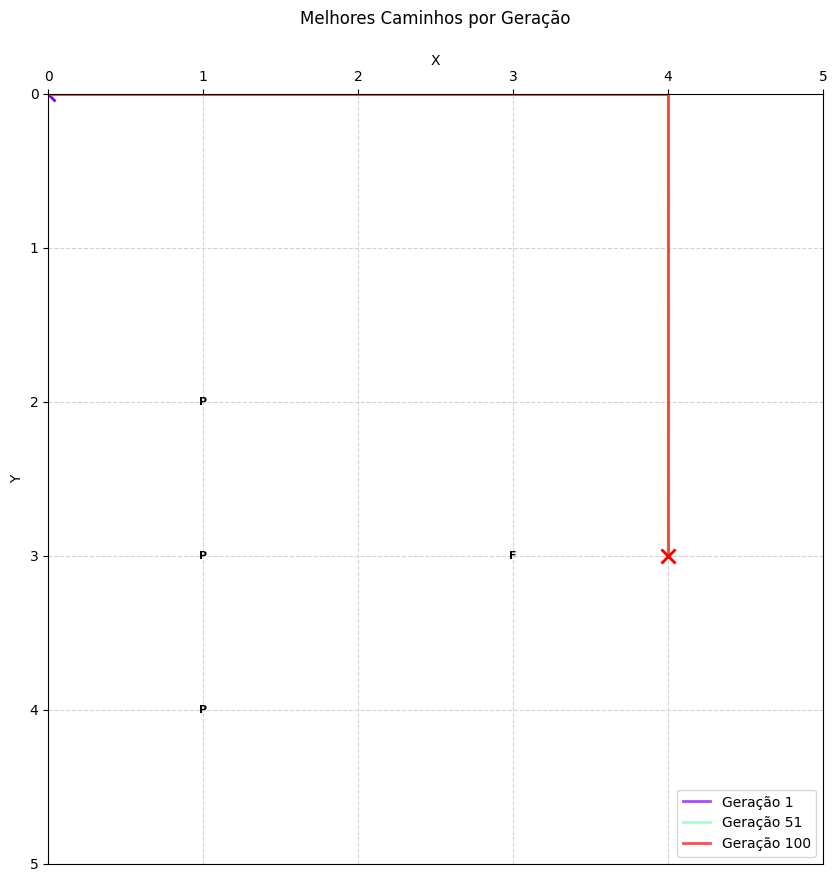

In [12]:

motor = controlador.criar_motor("genetico")
agente =  motor.agentes[0]
caminhos = [reconstruir_caminho(agente.posicaoAtual, agente.angulo, c) for c in controlador.melhores_caminhos_gen]

graficoCaminhos(caminhos,motor)

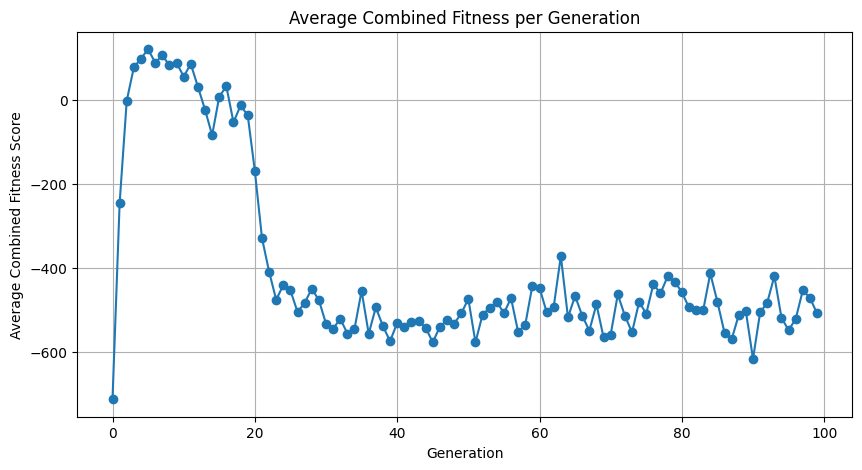

In [13]:
grafico_fitness(controlador.fitness_medio_geracao)

{(0.0, 0.0): 148, (1.0, 0.0): 99, (2.0, 0.0): 99, (3.0, 0.0): 99, (4.0, 0.0): 99, (4.0, 1.0): 99, (4.0, 2.0): 99, (4.0, 3.0): 99}


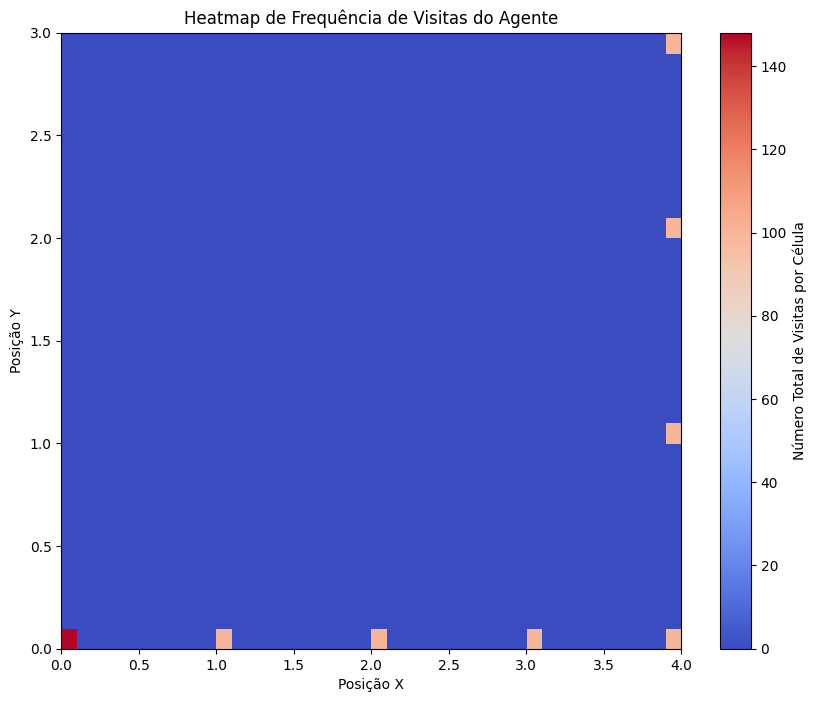

In [14]:
motor = controlador.criar_motor("genetico")
agente =  motor.agentes[0]
mapa = calcular_mapa(agente.posicaoAtual, agente.angulo,controlador.melhores_caminhos_gen)
print(mapa)

criar_heatMap(mapa)

In [24]:
changeTest(ficheiro_controlador)
controlador = criarControlador(ficheiro_controlador)
controlador.executa()

### Recoleção

In [25]:
from controlador import criarControlador

def resetRecolecaoGenetico(ficheiro_controlador, ficheiro_simulacao, ficheiro_agente, politica, tempo,geracoes,num_individuos,taxa_mutacao,taxa_elite,novelty_weight,num_novelty,num_archives,torneio):
    texto_controlador = f"A\nR {tempo}\n{politica}\n{geracoes}\n{num_individuos}\n{taxa_mutacao}\n{taxa_elite}\n{novelty_weight}\n{num_novelty}\n{num_archives}\n{torneio}\nMS {ficheiro_simulacao}"
    texto_simulação = f"5\n50\nAG {ficheiro_agente}\nE ninho (3,3) False False 0\nE parede (1,2) False True 0\nE ovo (2,1) True False 7"
    texto_agente = "1\n(0,0)\n0\nS (0,-1) (0,1) (1,0)"

    with open(ficheiro_controlador, "w", encoding="utf-8") as f:
        f.write(texto_controlador)
    with open(ficheiro_simulacao, "w", encoding="utf-8") as f:
        f.write(texto_simulação)
    with open("agentes/" + ficheiro_agente, "w", encoding="utf-8") as f:
        f.write(texto_agente)

In [26]:
GERACOES = 100
NUM_INDIVIDUOS = 200
TAXA_MUTACAO = 0.1
TAXA_ELITE = 0.2
NOVELTY_WEIGHT = 1000
NUMBER_NOVELTY = 5
NUMBER_ARCHIVES = 5
NUM_TORNEIO = 5

ficheiro_controlador = "controladorGenetico_recolecao.txt"
resetRecolecaoGenetico(ficheiro_controlador, "simulacao_recolecao_genetico.txt", "agente_genetico_recolecao.txt", "genetico", 30,GERACOES,NUM_INDIVIDUOS,TAXA_MUTACAO,TAXA_ELITE,NOVELTY_WEIGHT,NUMBER_NOVELTY,NUMBER_ARCHIVES,NUM_TORNEIO)
controlador = criarControlador(ficheiro_controlador)
controlador.executa()

Gen 1/100 | Avg Combined: -366.73 | Melhor fitness: 995.10)
Gen 2/100 | Avg Combined: 182.64 | Melhor fitness: 461.77)
Gen 3/100 | Avg Combined: 334.68 | Melhor fitness: 395.10)


KeyboardInterrupt: 

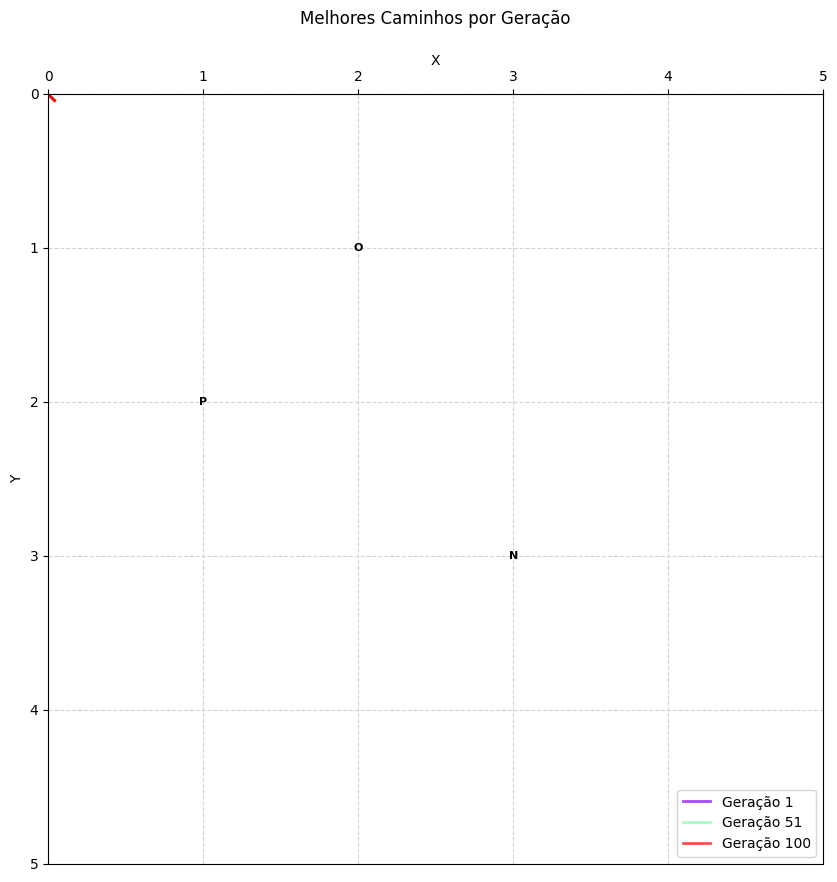

In [31]:
motor = controlador.criar_motor("genetico")
agente =  motor.agentes[0]
caminhos = [reconstruir_caminho(agente.posicaoAtual, agente.angulo, c) for c in controlador.melhores_caminhos_gen]

graficoCaminhos(caminhos,motor)

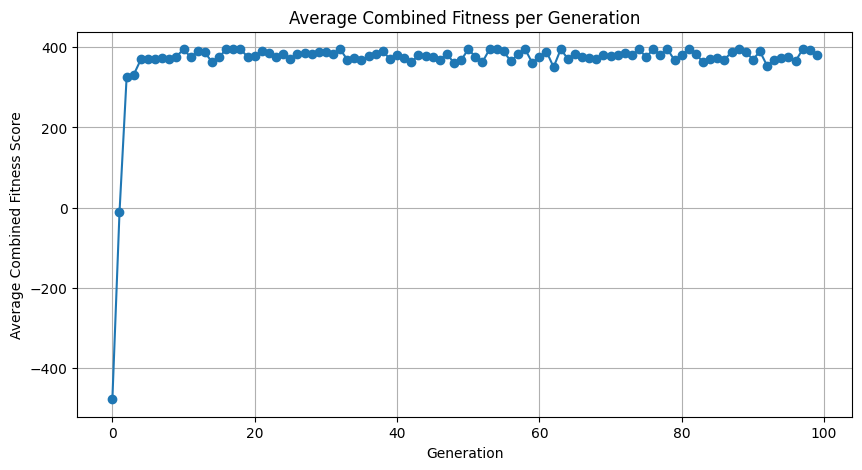

In [32]:
grafico_fitness(controlador.fitness_medio_geracao)


In [ ]:
changeTest(ficheiro_controlador)
controlador = criarControlador(ficheiro_controlador)
controlador.executa()

## Teste Algoritmo Reforço

In [29]:
def grafico_fitness(recompensas):
    plt.figure(figsize = (10,5))
    plt.plot(range(len(recompensas)),recompensas,marker = 'o')
    plt.title("Recompensas por 100 episódios")
    plt.xlabel("Episodios")
    plt.ylabel("Recompensa máxima encontrada")
    plt.grid(True)
    plt.show()

### Farol

In [30]:
from controlador import criarControlador

def resetFarolReforco(ficheiro_controlador, ficheiro_simulacao, ficheiro_agente, politica,episodios,alpha,gama,eps_inicial,eps_final):
    texto_controlador = f"A\nF\n{politica}\n{episodios}\nMS {ficheiro_simulacao}"
    texto_simulação = f"5\n50\nAG {ficheiro_agente}\n E farol (3,3) False False 100\nE parede (1,2) False True 0\nE parede (1,3) False True 0\nE parede (1,4) False True 0"
    texto_agente = f"1\n(0,0)\n0\nS (0,-1) (0,1) (1,0)\n{alpha}\n{gama}\n{eps_inicial}\n{eps_final}"

    with open(ficheiro_controlador, "w", encoding="utf-8") as f:
        f.write(texto_controlador)
    with open(ficheiro_simulacao, "w", encoding="utf-8") as f:
        f.write(texto_simulação)
    with open("agentes/" + ficheiro_agente, "w", encoding="utf-8") as f:
        f.write(texto_agente)


def changeTest(ficheiro_controlador):
    with open(ficheiro_controlador, "r", encoding="utf-8") as f:
        linhas = f.readlines()
    linhas[0] = "T\n"
    with open(ficheiro_controlador, "w", encoding="utf-8") as f:
        f.writelines(linhas)


In [31]:
EPISODIOS = 20000
ALPHA = 0.3
GAMA = 0.95
EPS_INICIAL = 1
EPS_FINAL = 0.05

ficheiro_controlador = "controladorReforco_farol.txt"
resetFarolReforco(ficheiro_controlador, "simulacao_farol_reforco.txt", "agente_reforco_farol.txt", "reforco",
                  EPISODIOS,ALPHA,GAMA,EPS_INICIAL,EPS_FINAL)
controlador = criarControlador(ficheiro_controlador)
controlador.executa()

Episódio: 0/20000: Recompensa máxima encontrada: 150.0
Episódio: 1000/20000: Recompensa máxima encontrada: 7314.952003695028
Episódio: 2000/20000: Recompensa máxima encontrada: 9289.865949867553
Episódio: 3000/20000: Recompensa máxima encontrada: 9760.806742757331
Episódio: 4000/20000: Recompensa máxima encontrada: 9926.41743686713
Episódio: 5000/20000: Recompensa máxima encontrada: 9976.669264530836
Episódio: 6000/20000: Recompensa máxima encontrada: 9992.141547627945
Episódio: 7000/20000: Recompensa máxima encontrada: 9997.58251936338
Episódio: 8000/20000: Recompensa máxima encontrada: 9999.2218195938
Episódio: 9000/20000: Recompensa máxima encontrada: 9999.778033505754
Episódio: 10000/20000: Recompensa máxima encontrada: 9999.937636456387
Episódio: 11000/20000: Recompensa máxima encontrada: 9999.9839973639
Episódio: 12000/20000: Recompensa máxima encontrada: 9999.994690711112
Episódio: 13000/20000: Recompensa máxima encontrada: 9999.998264928343
Episódio: 14000/20000: Recompensa máx

In [33]:
controlador.executa()
motor = controlador.criar_motor("reforco")
agente = motor.agentes[0]
print(controlador.melhores_recompensas_ep)
caminhos = [reconstruir_caminho(agente.posicaoAtual, agente.angulo, c) for c in controlador.melhores_recompensas_ep]

graficoCaminhos(caminhos, motor)

Episódio: 0/20000: Recompensa máxima encontrada: 0
Episódio: 1000/20000: Recompensa máxima encontrada: 7232.5512161560755
Episódio: 2000/20000: Recompensa máxima encontrada: 9174.003832798566
Episódio: 3000/20000: Recompensa máxima encontrada: 9717.54426478504
Episódio: 4000/20000: Recompensa máxima encontrada: 9918.206028047502
Episódio: 5000/20000: Recompensa máxima encontrada: 9972.86273194205
Episódio: 6000/20000: Recompensa máxima encontrada: 9989.6846284276
Episódio: 7000/20000: Recompensa máxima encontrada: 9997.145273748698
Episódio: 8000/20000: Recompensa máxima encontrada: 9998.914866376499
Episódio: 9000/20000: Recompensa máxima encontrada: 9999.671189687511
Episódio: 10000/20000: Recompensa máxima encontrada: 9999.903332586118
Episódio: 11000/20000: Recompensa máxima encontrada: 9999.97242679615
Episódio: 12000/20000: Recompensa máxima encontrada: 9999.992483718193
Episódio: 13000/20000: Recompensa máxima encontrada: 9999.997390608816
Episódio: 14000/20000: Recompensa máxim

TypeError: 'float' object is not iterable

In [42]:
changeTest(ficheiro_controlador)
controlador = criarControlador(ficheiro_controlador)
controlador.executa()

TclError: invalid command name ".!canvas"

In [ ]:
grafico_fitness(controlador.melhores_recompensas_ep)

### Recolecao

In [51]:
from controlador import criarControlador

def resetRecolecaoReforco(ficheiro_controlador, ficheiro_simulacao, ficheiro_agente, politica,tempo,episodios,alpha,gama,eps_inicial,eps_final):
    texto_controlador = f"A\nR {tempo}\n{politica}\n{episodios}\nMS {ficheiro_simulacao}"
    texto_simulação = f"5\n50\nAG {ficheiro_agente}\nE ninho (3,3) False False 0\nE parede (1,2) False True 0\nE ovo (2,1) True False 10"
    texto_agente = f"1\n(0,0)\n0\nS (0,-1) (0,1) (1,0)\n{alpha}\n{gama}\n{eps_inicial}\n{eps_final}"

    with open(ficheiro_controlador, "w", encoding="utf-8") as f:
        f.write(texto_controlador)
    with open(ficheiro_simulacao, "w", encoding="utf-8") as f:
        f.write(texto_simulação)
    with open("agentes/" + ficheiro_agente, "w", encoding="utf-8") as f:
        f.write(texto_agente)

In [24]:
EPISODIOS = 10000
ALPHA = 0.4
GAMA = 0.99
EPS_INICIAL = 1
EPS_FINAL = 0.05

ficheiro_controlador = "controladorReforco_recolecao.txt"
resetRecolecaoReforco(ficheiro_controlador, "simulacao_recolecao_reforco.txt", "agente_reforco_recolecao.txt", "reforco",30,
                  EPISODIOS, ALPHA, GAMA, EPS_INICIAL, EPS_FINAL)
controlador = criarControlador(ficheiro_controlador)
controlador.executa()

Episódio: 0/10000: Recompensa máxima encontrada: 720.0
Episódio: 1000/10000: Recompensa máxima encontrada: 8291.865935830177
Episódio: 2000/10000: Recompensa máxima encontrada: 12829.697553948228
Episódio: 3000/10000: Recompensa máxima encontrada: 18033.749776189325
Episódio: 4000/10000: Recompensa máxima encontrada: 21269.764396858143
Episódio: 5000/10000: Recompensa máxima encontrada: 25685.890214222967
Episódio: 6000/10000: Recompensa máxima encontrada: 28665.36709575844
Episódio: 7000/10000: Recompensa máxima encontrada: 32649.907627778015
Episódio: 8000/10000: Recompensa máxima encontrada: 34665.929941556715
Episódio: 9000/10000: Recompensa máxima encontrada: 36620.82390934152
Episódio: 10000/10000: Recompensa máxima encontrada: 38364.53048865348


In [25]:
changeTest(ficheiro_controlador)
controlador = criarControlador(ficheiro_controlador)
controlador.executa()